# Data Analytics - Preprocessing

# Pair 1 - BAJAJ-AUTO and HEROMOTOCO

---

# 1. Importing required modules

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint

---

# 2. Get the dataset from pairs data

In [2]:
pair_df = pd.read_csv("../../Storage/pairs_data/HEROMOTOCO-BAJAJ-AUTO-0.csv")
pair_df.head()

,Date,HEROMOTOCO_Close,BAJAJ-AUTO_Close,Spread,zscore
0,2018-09-04,3184.149902,2735.550049,448.599854,2.186180
1,2018-09-05,3145.399902,2772.300049,373.099854,1.220189
2,2018-09-06,3164.850098,2783.100098,381.750000,1.330864
3,2018-09-07,3329.350098,2923.550049,405.800049,1.638574
4,2018-09-10,3278.300049,2868.600098,409.699951,1.688472


In [3]:
pair_df.describe()

,HEROMOTOCO_Close,BAJAJ-AUTO_Close,Spread,zscore
count,59.000000,59.000000,59.000000,5.900000e+01
mean,2951.445764,2673.713573,277.732190,-3.189539e-16
std,160.381025,108.273934,78.828992,1.008584e+00
min,2695.100098,2475.149902,106.500000,-2.190844e+00
25%,2847.675049,2592.025024,208.349976,-8.877163e-01
50%,2920.100098,2668.850098,284.699951,8.914958e-02
75%,3094.075073,2752.500000,337.974976,7.707811e-01
max,3329.350098,2923.550049,448.599854,2.186180e+00


---

# 3. Calculation of correlation and co-integration

## 3.1. Calculation of correlation between the 2 stocks' closing prices

In [4]:
corr_df = pair_df[["HEROMOTOCO_Close", "BAJAJ-AUTO_Close"]]
corr_df.head()

,HEROMOTOCO_Close,BAJAJ-AUTO_Close
0,3184.149902,2735.550049
1,3145.399902,2772.300049
2,3164.850098,2783.100098
3,3329.350098,2923.550049
4,3278.300049,2868.600098


In [5]:
corr = corr_df.corr()
corr.style.background_gradient()

,HEROMOTOCO_Close,BAJAJ-AUTO_Close
HEROMOTOCO_Close,1.000000,0.899256
BAJAJ-AUTO_Close,0.899256,1.000000


- We can see that the closing prices of the 2 stocks are highly correlated

## 3.2. Calculation of p-value to see if the stocks are co-integrated

In [6]:
score, pvalue, _ = coint(pair_df["HEROMOTOCO_Close"], pair_df["BAJAJ-AUTO_Close"])
pvalue

0.024984061040578365

- We also find that with a p-value < 0.05, the correlation is statistically significant

## 3.3. Visualization of the pair

Text(0, 0.5, 'Price')

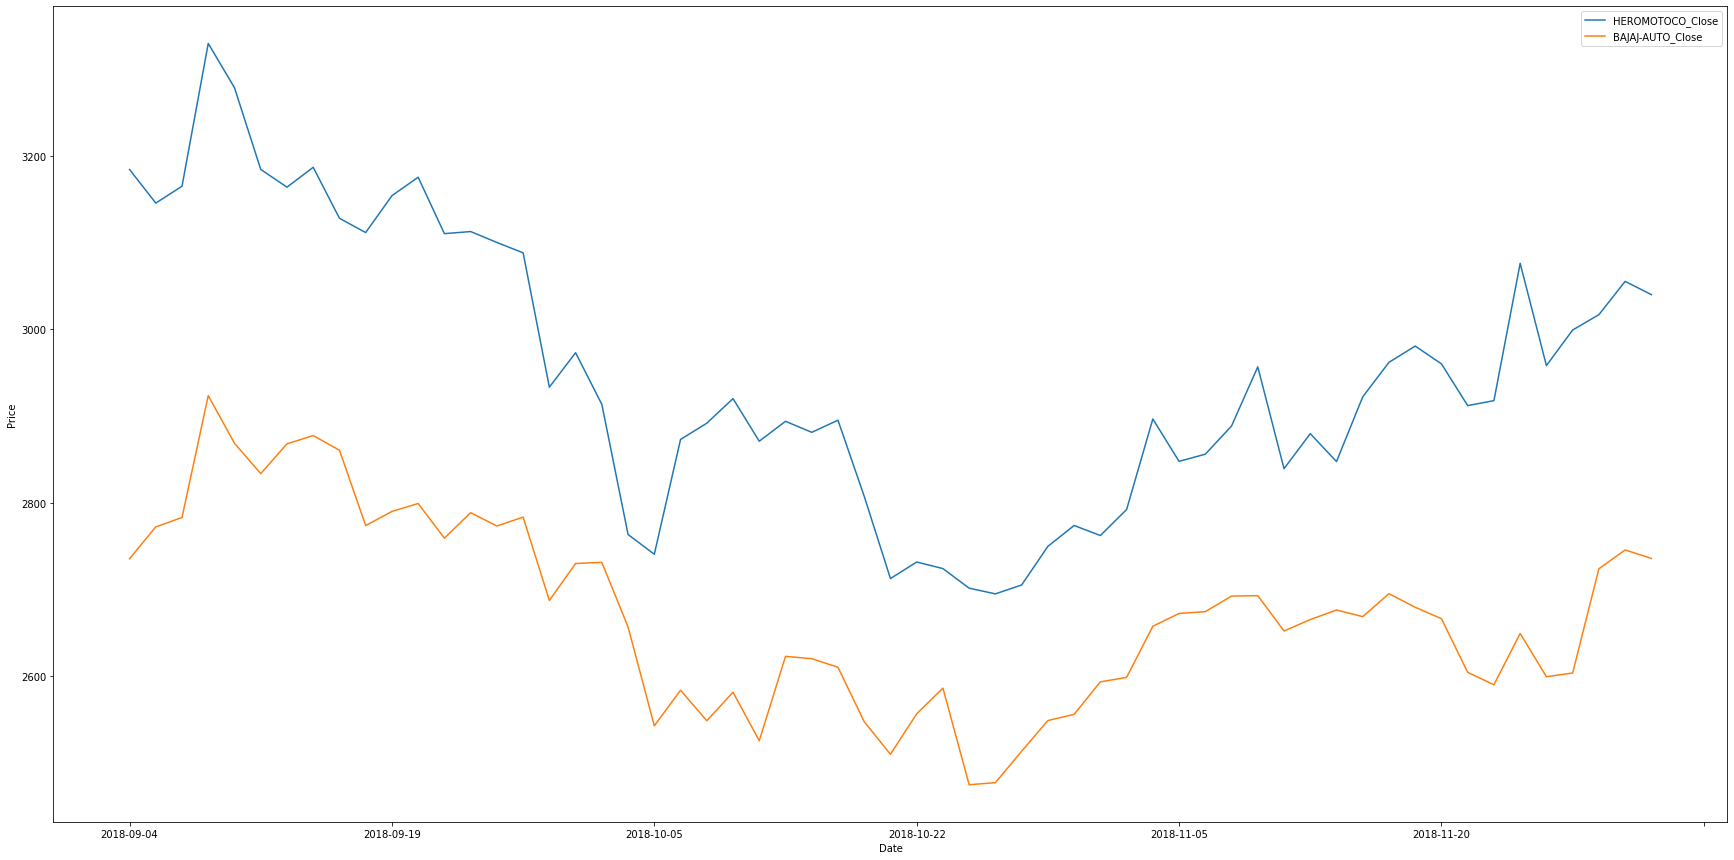

In [7]:
pair_price_plt = pair_df.plot(x='Date', y=['HEROMOTOCO_Close', 'BAJAJ-AUTO_Close'], figsize=(30,15))
pair_price_plt.set_xlabel("Date")
pair_price_plt.set_ylabel("Price")

- We can see that even visually, the stocks are moving in tandem
- This further confirms the validity of the stock pair

---

# 4. Understanding the Spread between the stock pair

## 4.1. Visualizing the spread between the stock pair

Text(0, 0.5, 'Price')

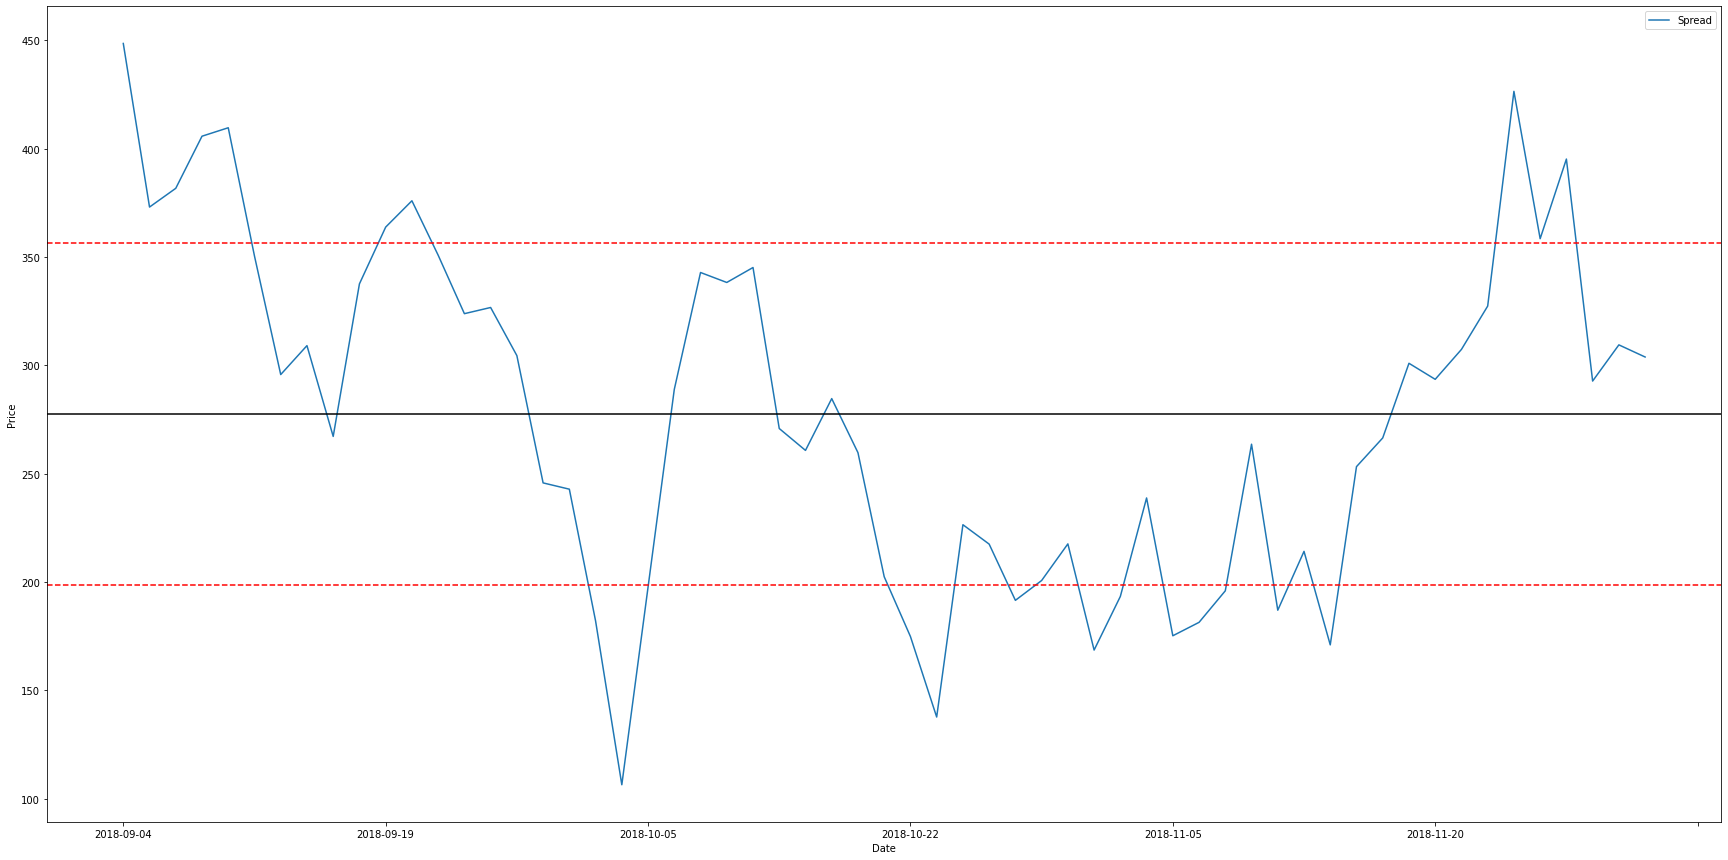

In [8]:
pair_spread_mean = pair_df['Spread'].mean()
spread_std = pair_df['Spread'].std()

pair_spread_plt = pair_df.plot(x='Date', y=['Spread'], figsize=(30,15))

pair_spread_plt.axhline(pair_spread_mean, c='black')
pair_spread_plt.axhline(pair_spread_mean + spread_std, c='red', ls = "--")
pair_spread_plt.axhline(pair_spread_mean - spread_std, c='red', ls = "--")

pair_spread_plt.set_ylabel("Price")

__In the graph above:__
- The blue line is the spread
- The Black line is mean price
- The Red dotted lines represent 1 and 2 standard deviations above and below the mean respectively


## 4.2. Visualizing the zscore of spread between the stock pairs

Text(17.200000000000017, 0.5, 'zscore')

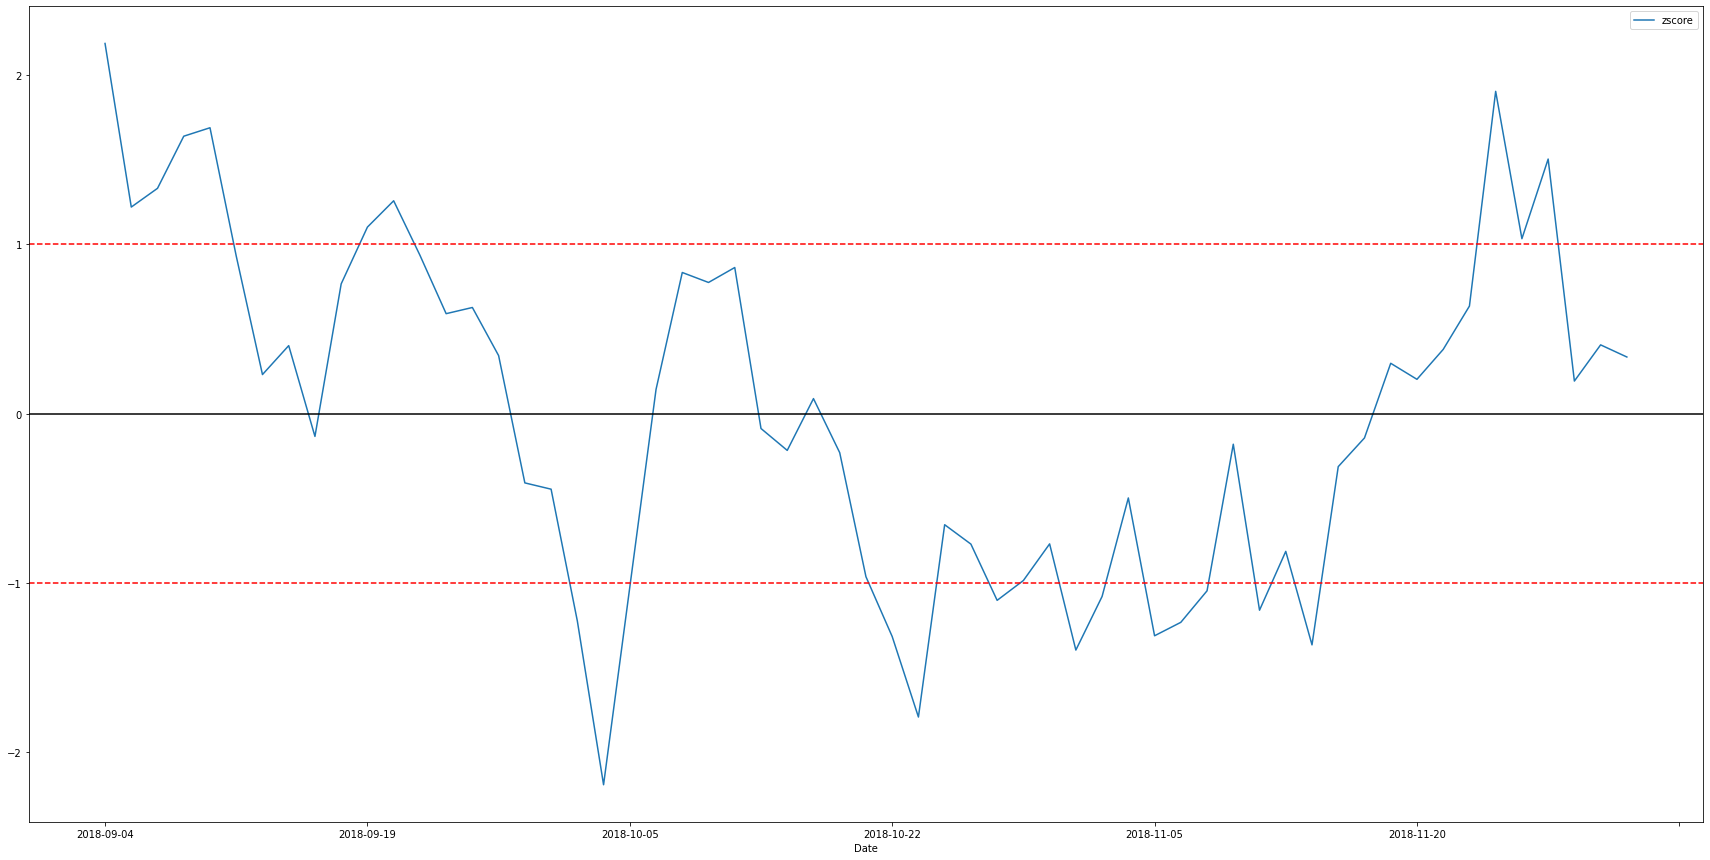

In [9]:
pair_zscore_plt = pair_df.plot(x='Date', y='zscore', figsize=(30,15))

pair_zscore_plt.axhline(0, c='black')
pair_zscore_plt.axhline(1, c='red', ls = "--")
pair_zscore_plt.axhline(-1, c='red', ls = "--")

pair_spread_plt.set_ylabel("zscore")

__In the graph above:__
- The blue line is the zscore of the spread
- The Black line is at 0
- The Red dotted lines represent 1 and -1 respectively

---


# 5. Generating orders on the pair

## 5.1. Function definition and parameters for orders generation

In [10]:
# long positions
# short positions
# flat positions
# Get out of a position

def generate_orders(prices):
    
    orders = []
    
    position = "FLAT"
    
    # Keep track of last price
    # prev_price = None
    
    for price in prices:
        
        # Get out of a LONG position
        if position == "LONG" and (price == 0 or price > 0):
            orders.append("GET_OUT_OF_POSITION")
            position = "FLAT"
            
        # Get out of a SHORT position
        elif position == "SHORT" and (price == 0 or price < 0):
            orders.append("GET_OUT_OF_POSITION")
            position = "FLAT"

        # Get into a long position
        elif price < -1.5:
            position = "LONG"
            orders.append("LONG")

        # Get into a long position
        elif price > 1.5:
            position = "SHORT"
            orders.append("SHORT")

        # Default if no other order is placed
        else:
            orders.append("FLAT")

    return orders


## 5.2. Making a copy of the dataframe to add orders

In [11]:
pair_orders_df = pair_df.copy()
pair_orders_df.head()

,Date,HEROMOTOCO_Close,BAJAJ-AUTO_Close,Spread,zscore
0,2018-09-04,3184.149902,2735.550049,448.599854,2.186180
1,2018-09-05,3145.399902,2772.300049,373.099854,1.220189
2,2018-09-06,3164.850098,2783.100098,381.750000,1.330864
3,2018-09-07,3329.350098,2923.550049,405.800049,1.638574
4,2018-09-10,3278.300049,2868.600098,409.699951,1.688472


## 5.3. Generating orders on the pair

In [12]:
pair_orders_df["Orders"] = generate_orders(pair_df["zscore"])
pair_orders_df.head()

,Date,HEROMOTOCO_Close,BAJAJ-AUTO_Close,Spread,zscore,Orders
0,2018-09-04,3184.149902,2735.550049,448.599854,2.186180,SHORT
1,2018-09-05,3145.399902,2772.300049,373.099854,1.220189,FLAT
2,2018-09-06,3164.850098,2783.100098,381.750000,1.330864,FLAT
3,2018-09-07,3329.350098,2923.550049,405.800049,1.638574,SHORT
4,2018-09-10,3278.300049,2868.600098,409.699951,1.688472,SHORT


__In the orders above__:
- *LONG* - denotes that a LONG position be taken on HEROMOTOCO and simultaneously a SHORT position be taken on BAJAJ-AUTO on the closing price of that date.
- *SHORT* - denotes that a SHORT position be taken on HEROMOTOCO and simultaneously a LONG position be taken on BAJAJ-AUTO on the closing price of that date.
- *FLAT* - denotes no order to be placed on that day.
- *GET_OUT_OF_POSTION* - denotes to cash in on all previous orders on that date and have no out standing LONG or SHORT positions as of that date.

## 5.4 Display all orders which are not *FLAT*

In [13]:
pair_orders_df[pair_orders_df['Orders'] != "FLAT"]

,Date,HEROMOTOCO_Close,BAJAJ-AUTO_Close,Spread,zscore,Orders
0,2018-09-04,3184.149902,2735.550049,448.599854,2.186180,SHORT
3,2018-09-07,3329.350098,2923.550049,405.800049,1.638574,SHORT
4,2018-09-10,3278.300049,2868.600098,409.699951,1.688472,SHORT
8,2018-09-17,3127.899902,2860.649902,267.250000,-0.134115,GET_OUT_OF_POSITION
19,2018-10-04,2763.500000,2657.000000,106.500000,-2.190844,LONG
21,2018-10-08,2873.050049,2584.100098,288.949951,0.143527,GET_OUT_OF_POSITION
31,2018-10-23,2724.250000,2586.500000,137.750000,-1.791013,LONG
49,2018-11-19,2980.649902,2679.649902,301.000000,0.297702,GET_OUT_OF_POSITION
53,2018-11-26,3076.000000,2649.500000,426.500000,1.903422,SHORT
55,2018-11-28,2999.149902,2603.899902,395.250000,1.503591,SHORT


## 5.5. Visualize the orders placed

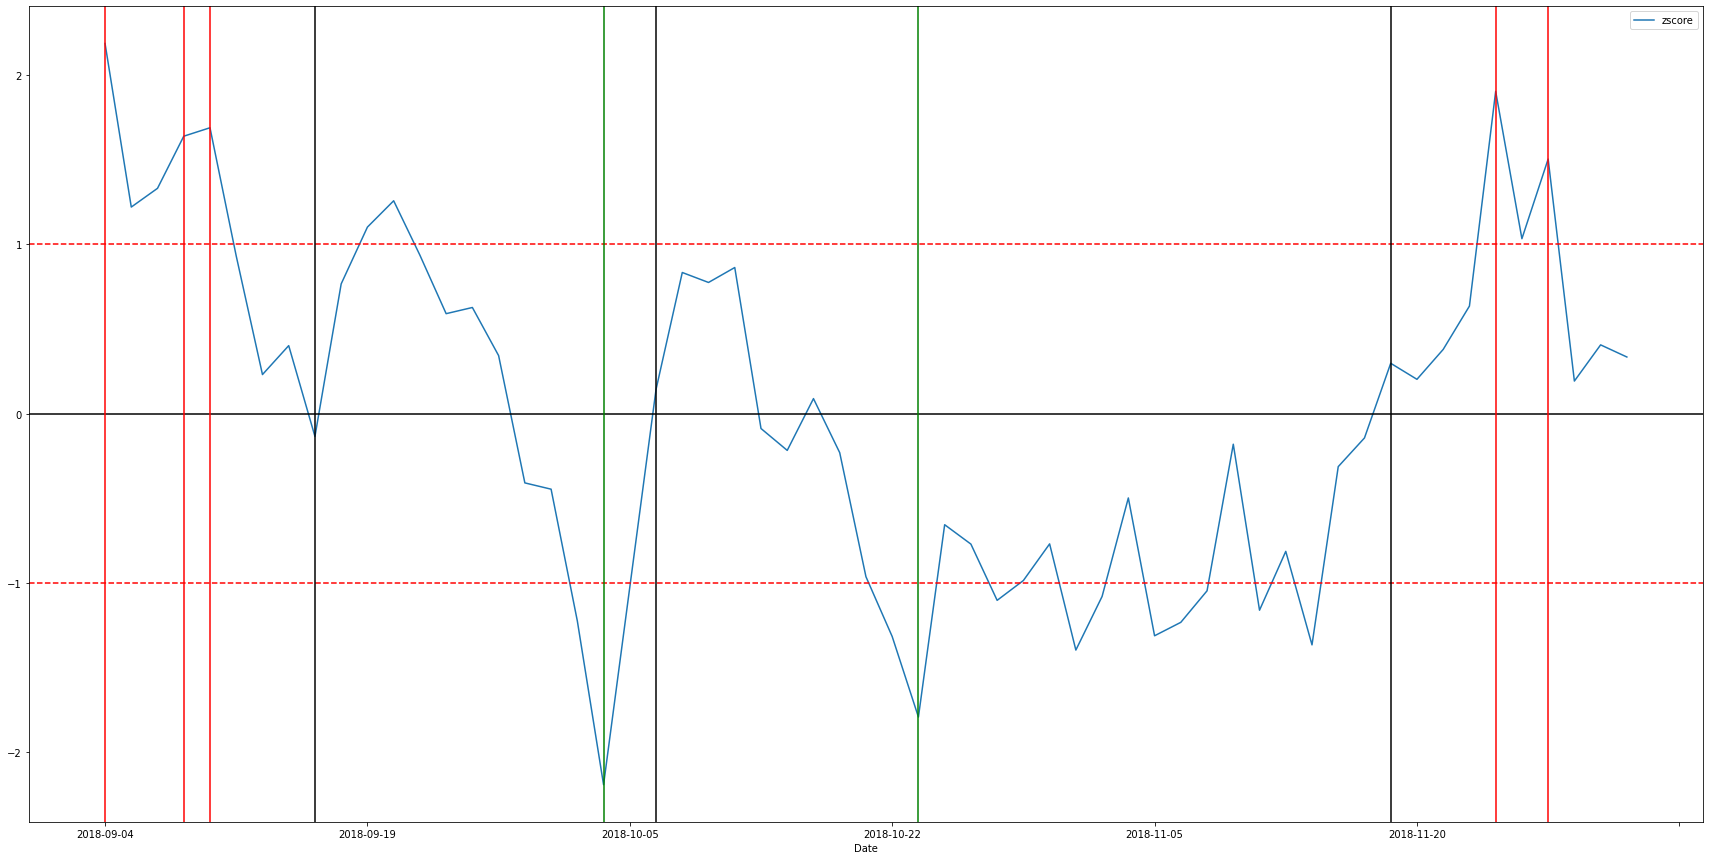

In [14]:
# Plotting the zscore of the Spread of 20 day Simple Moving Average
orders_plt = pair_orders_df.plot(x='Date', y='zscore', figsize=(30,15))

# Plotting the lines at mean, 1 and 2 std. dev.
orders_plt.axhline(0, c='black')
orders_plt.axhline(1, c='red', ls = "--")
orders_plt.axhline(-1, c='red', ls = "--")

# Extracting orders
Orders = pair_orders_df['Orders']

# Plot vertical lines where orders are placed
for order in range(len(Orders)):
    
    if Orders[order] != "FLAT":
        
        # GREEN line for a long position
        if Orders[order] == "LONG":
            orders_plt.axvline(x=order, c = "green")
        
        # RED line for a short position
        elif Orders[order] == "SHORT":
            orders_plt.axvline(x=order, c = "red")
        
        # BLACK line for getting out of all positions at that point
        else:
            orders_plt.axvline(x=order, c = "black")


__In the figure above:__
- __Blue line__ - zscore of the Spread
- __Black horizontal line__ at 0 - Mean
- __Red dotted horizontal lines__ - at +1 and -1 standard deviations
- __Green vertical line__ - represents long position taken on that day
- __Red vertical line__ - represents short position taken on that day
- __Black vertical line__ - represents getting out of all open positions till that point


## 5.6 Put the orders into a csv

In [15]:
pair_orders_df = pair_orders_df.set_index('Date')
pair_orders_df.to_csv('Pair1_orders.csv')